In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
RESULTS_FILE_PATH = "benchmarks/results/results.csv"

In [3]:
commit = str(subprocess.check_output(['git', 'rev-parse', 'HEAD'])).replace("b'", "").replace("\\n'", "")

In [4]:
df = pd.read_csv(RESULTS_FILE_PATH)
df.sort_values('throughput', ascending=False)

,implementation,n_features,n_neighbors,n_samples_test,n_samples_train,throughput,time_elapsed,trial,working_memory
3,New (double chunking),100.0,10.0,1000.0,1000000.0,0.581871,1.37625,0.0,"(2097152, 171)"
2,New (double chunking),100.0,10.0,1000.0,1000000.0,0.569940,1.40506,0.0,"(524288, 81)"
10,New (double chunking),100.0,10.0,1000.0,1000000.0,0.551857,1.45110,1.0,"(2097152, 171)"
9,New (double chunking),100.0,10.0,1000.0,1000000.0,0.536690,1.49211,1.0,"(524288, 81)"
17,New (double chunking),100.0,10.0,1000.0,1000000.0,0.526375,1.52135,2.0,"(2097152, 171)"
1,New (double chunking),100.0,10.0,1000.0,1000000.0,0.525477,1.52395,0.0,"(131072, 36)"
4,New (double chunking),100.0,10.0,1000.0,1000000.0,0.524444,1.52695,0.0,"(4194304, 246)"
24,New (double chunking),100.0,10.0,1000.0,1000000.0,0.518838,1.54345,3.0,"(2097152, 171)"
16,New (double chunking),100.0,10.0,1000.0,1000000.0,0.517079,1.54870,2.0,"(524288, 81)"
8,New (double chunking),100.0,10.0,1000.0,1000000.0,0.511096,1.56683,1.0,"(131072, 36)"


In [5]:
cols = ["n_samples_train", "n_samples_test", "n_features", "n_neighbors"]
df[cols] = df[cols].astype(np.uint32)

In [6]:
df_grouped = df.groupby(["n_samples_train", "n_samples_test", "n_features", "n_neighbors"])

In [7]:
y_labels = {
    "time_elapsed": "Time elapsed (in s)",
    "throughput": "Thoughput (in GB/s)"
}

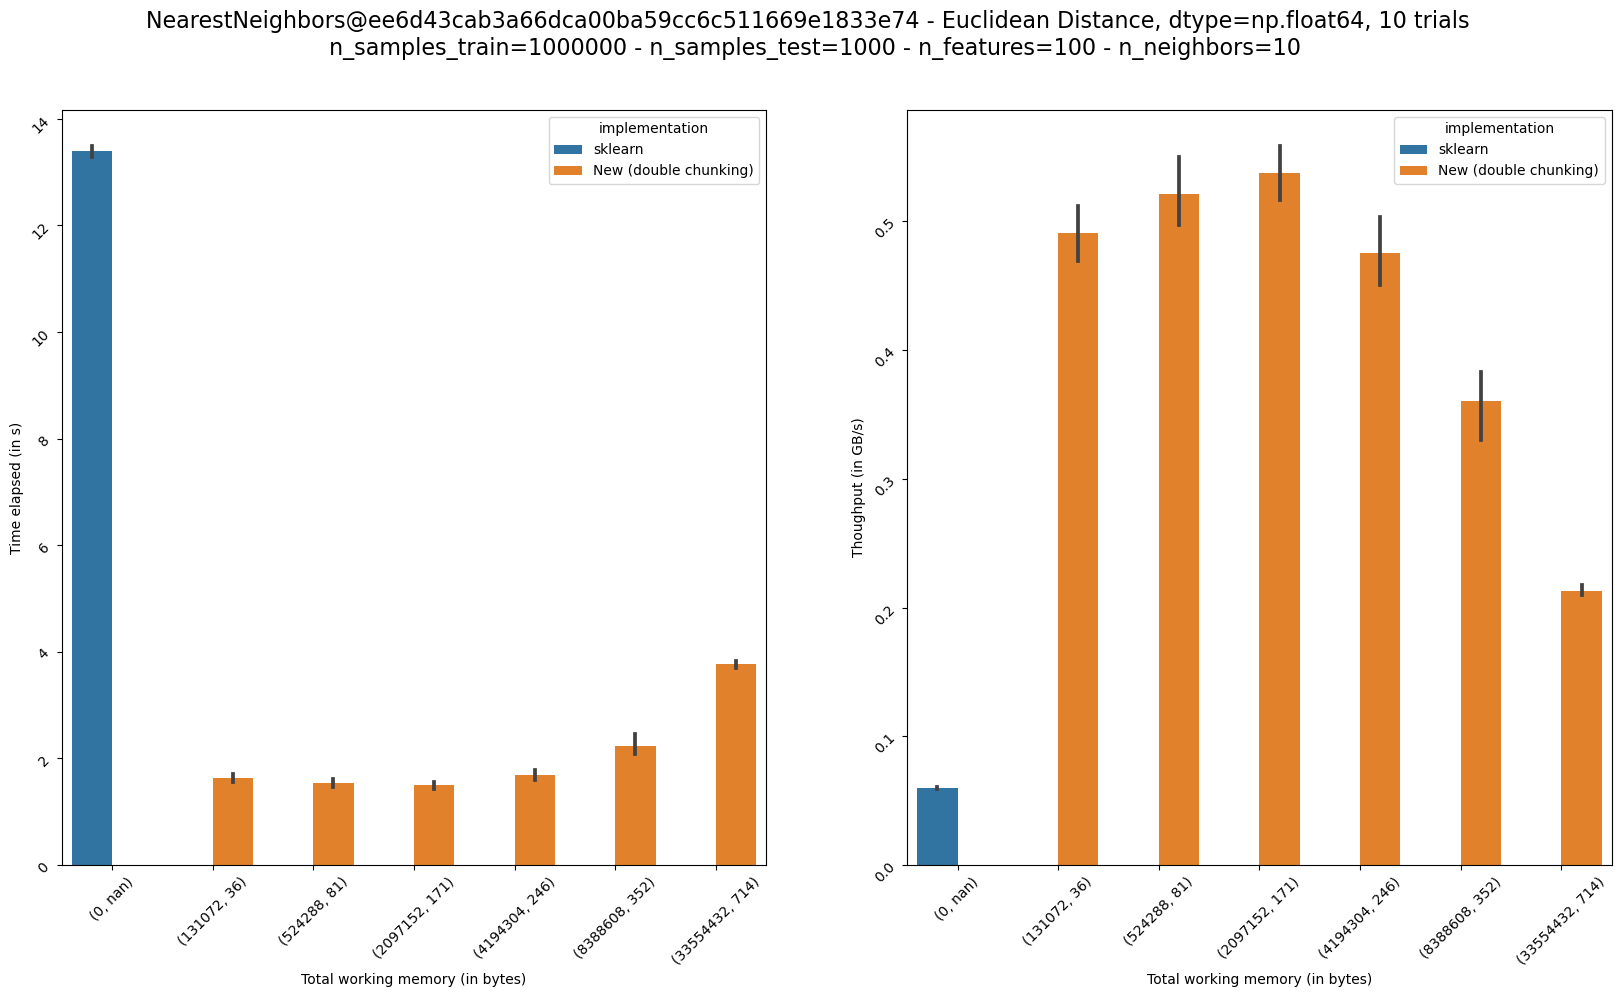

In [8]:
for vals, df in df_grouped:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    axes = axes.flatten()
    for col, ax in zip(["time_elapsed", "throughput"], axes):
        _ = sns.barplot(x="working_memory", y=col, hue="implementation", data=df, ax=ax)
        _ = ax.set_ylabel(y_labels[col])
        _ = ax.set_xlabel("Total working memory (in bytes)")
        ax.tick_params(labelrotation=45)
    title = f"NearestNeighbors@{commit}" + " - Euclidean Distance, dtype=np.float64, 10 trials \n n_samples_train=%s - n_samples_test=%s - n_features=%s - n_neighbors=%s" % vals
    _ = fig.suptitle(title, fontsize=16)
    #fig.savefig(title.replace(" - ","_").replace("\n","_").lower() + ".png")